## 1. Recurrent Neural Network [RNN]

* Reference. https://data-science.tistory.com/67


In [1]:
import torch
import torch.nn as nn

input_size = 5
hidden_size = 8

# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [2]:
cell = nn.RNN(input_size, hidden_size, batch_first=True) # defines the RNN architecture
# batch_first = True -> indicates that the first dimension stands for the batch size
# if False, the input should be (10, 5), i.e. (time_steps, input_size), getting rid of the batch_size

In [3]:
outputs, _status = cell(inputs)

print(outputs.shape) # hidden_state of every time step (8-dim hidden_state for 10 time steps)

torch.Size([1, 10, 8])


In [4]:
print(_status.shape) # hidden_state of the final layer only (8-dim hidden_state for 1 time step)

torch.Size([1, 1, 8])


In [5]:
# Deeper RNN
# (batch_size, time_steps, input_size)
inputs2 = torch.Tensor(1, 10, 5)
cell2 = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True) # num_layers = 2 -> deeper RNN (default: 1)
outputs2, _status2 = cell2(inputs2)
print(outputs2.shape) # hidden_state of every time step (8-dim hidden_state for 10 time steps) -> only returns the last layer
print(_status2.shape) # hidden_state of the final layer only (8-dim hidden_state for 1 time step) -> returns the output for all 2 layers

torch.Size([1, 10, 8])
torch.Size([2, 1, 8])


In [6]:
# Deeper RNN
# (batch_size, time_steps, input_size)
inputs3 = torch.Tensor(1, 10, 5)
cell3 = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 3, batch_first=True) # num_layers = 3 -> deeper RNN (default: 1)
outputs3, _status3 = cell3(inputs3)
print(outputs3.shape) # hidden_state of every time step (8-dim hidden_state for 10 time steps) -> only returns the last layer
print(_status3.shape)
# hidden_state of the final layer only (8-dim hidden_state for 1 time step) -> returns the output for all 3 layers

torch.Size([1, 10, 8])
torch.Size([3, 1, 8])


.


## 2. Long Short Term Memory [LSTM]

In [7]:
# Deeper LSTM -- we only need to change nn.RNN into nn.LSTM
# (batch_size, time_steps, input_size)
inputs4 = torch.Tensor(1, 10, 5)
cell4 = nn.LSTM(input_size = 5, hidden_size = 8, num_layers = 4, batch_first=True) # num_layers = 4 -> deeper LSTM (default: 1)
outputs4, (h4, c4) = cell4(inputs4)
print(outputs4.shape) # hidden_state of every time step (8-dim hidden_state for 10 time steps) -> only returns the last layer
print(h4.shape) # hidden_state of the final layer only (8-dim hidden_state for 1 time step) -> returns the output for all 4 layers
print(c4.shape) # cell state of the final layer only (8-dim hidden_state for 1 time step) -> returns the output for all 4 layers

torch.Size([1, 10, 8])
torch.Size([4, 1, 8])
torch.Size([4, 1, 8])


.

## Question 1.
Write a code for LSTM having 10 internal layers (num_layers = 10) and change the input size into (5, 50, 5). Please stick to the format provided. Check if the size of the output, hidden, and cell state are calculated properly

In [9]:
inputs5 = torch.Tensor(5, 50, 5)
cell5 = nn.LSTM(input_size = 5, hidden_size = 8, num_layers = 10, batch_first=True)
outputs5, (h5, c5) = cell5(inputs5)
print(outputs5.shape)
print(h5.shape)
print(c5.shape)

torch.Size([5, 50, 8])
torch.Size([10, 5, 8])
torch.Size([10, 5, 8])


## Question 2. Describe the limiations of (Vanilla) RNN and how LSTM overcomes these limitations.

* RNN에는 (1)장기 의존성 문제와 (2)vanishing(or exploding) gradient 문제가 생길 수 있다. (1)의 경우 RNN은 시간 순서에 따라 정보를 전달하는데 길이가 길어질수록 초기 정보가 손실되기 쉽다. (2)에서는 weight update가 이어질수록 gradient값이 작아지거나 커질 수 있다. 그러다 보면 학습이 어려워질 수 있고, 특히나 장기 의존성을 요하는 학습이 어려둬 질수 있다.
* LSTM은 이러한 장기 기억 한계를 극복하기위해 설계되어 있다. 3가지 주요 gate를 도입해서 정보를 선택적으로 기억하며 sigmoid function을 활용하여 (0,1) 값을 출력한다.
*(1) input gate : 현재 입력과 이전 출력을 가지고 온다
*(2) forget gate : 앞의 정보를 선택하여 잊을지 말지 고민한다
*(3) output gate : 현재 입력과 이전 출력을 합쳐서 어떤 정보를 출력할지를 결정.

.

## 3. Gated Recurrent Unit [GRU]

## Question 3.
Write a code for GRU having 5 internal layers (num_layers = 5) and change the input size into (3, 45, 7). (Change the input_size adequately) Please stick to the format provided. Check if the size of output and hidden state are calculated properly.


* Hint: https://pytorch.org/docs/stable/generated/torch.nn.GRU.html Its implementation is similar to that of RNN.

In [10]:
inputs6 = torch.Tensor(3, 45, 7)
cell6 = nn.GRU(input_size = 7, hidden_size = 8, num_layers = 5, batch_first=True)
outputs6, _status6 = cell6(inputs6)
print(outputs6.shape)
print(_status6.shape)

torch.Size([3, 45, 8])
torch.Size([5, 3, 8])


.

## 4. On your Own

## Question 4. Choose one or two from the following documents:
* News topic Classification with RNN: https://glanceyes.com/entry/PyTorch%EB%A1%9C-RNN-%EB%AA%A8%EB%8D%B8-%EA%B5%AC%ED%98%84%ED%95%B4%EB%B3%B4%EA%B8%B0-AG-NEWS-%EB%89%B4%EC%8A%A4-%EA%B8%B0%EC%82%AC-%EC%A3%BC%EC%A0%9C-%EB%B6%84%EB%A5%98
* NAVER Movie Review Classification with LSTM: https://wikidocs.net/217687
* IMDB Review Classification with GRU: https://wikidocs.net/217083

## Read it and run the whole code. Write a simplified explanation for each cell.
Note. https://wikidocs.net/book/2788 and https://wikidocs.net/book/2155 provide lots of interesting codes!

## 1. 데이터 로드 및 단어 토큰화

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import torch
import urllib.request
from tqdm import tqdm
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/pytorch-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/IMDB%20Dataset.csv", filename="IMDB Dataset.csv")
## 데이터를 다운받고

('IMDB Dataset.csv', <http.client.HTTPMessage at 0x7fb21c55f250>)

In [20]:
df = pd.read_csv('IMDB Dataset.csv')
df
## df로 설정해서 읽어온다.
## 50000rows 2columns

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [21]:
df.info()
## 데이터 정보가 무엇인지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [22]:
print('결측값 여부 :',df.isnull().values.any())
## 결측값이 있나 없나 -> 있으면 바꿔줘야해
## 없대

결측값 여부 : False


<Axes: xlabel='sentiment'>

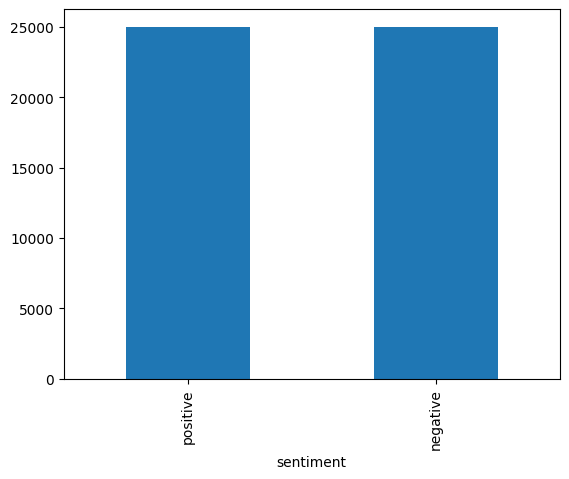

In [23]:
df['sentiment'].value_counts().plot(kind='bar')

In [24]:
print('레이블 개수')
print(df.groupby('sentiment').size().reset_index(name='count'))

레이블 개수
  sentiment  count
0  negative  25000
1  positive  25000


In [25]:
df['sentiment'] = df['sentiment'].replace(['positive','negative'],[1, 0])
df.head()
## 긍정은 1, 부정은 0으로 변환

review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1

In [26]:
X_data = df['review']
y_data = df['sentiment']
print('영화 리뷰의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))
## 갯수로 확인

영화 리뷰의 개수: 50000
레이블의 개수: 50000


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.5, random_state=0, stratify=y_data)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.2, random_state=0, stratify=y_train)

## train : test = 5:5
## train : valid = 2:8

print('--------훈련 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')
print('--------검증 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_valid.value_counts()[0]/len(y_valid) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_valid.value_counts()[1]/len(y_valid) * 100,3)}%')
print('--------테스트 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------훈련 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%
--------검증 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%
--------테스트 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%


In [28]:
## 토큰화 진행 후 상위 2개 샘플 출력
def tokenize(sentences):
  tokenized_sentences = []
  for sent in tqdm(sentences):
    tokenized_sent = word_tokenize(sent)
    tokenized_sent = [word.lower() for word in tokenized_sent]
    tokenized_sentences.append(tokenized_sent)
  return tokenized_sentences

tokenized_X_train = tokenize(X_train)
tokenized_X_valid = tokenize(X_valid)
tokenized_X_test = tokenize(X_test)

100%|██████████| 25000/25000 [01:03<00:00, 396.61it/s]


In [31]:
# 상위 샘플 2개 출력
for sent in tokenized_X_train[:2]:
  print(sent)

['have', 'you', 'ever', ',', 'or', 'do', 'you', 'have', ',', 'a', 'pet', 'who', "'s", 'been', 'with', 'you', 'through', 'thick', 'and', 'thin', ',', 'who', 'you', "'d", 'be', 'lost', 'without', ',', 'and', 'who', 'you', 'love', 'no', 'matter', 'what', '?', 'betcha', 'never', 'thought', 'they', 'feel', 'the', 'same', 'way', 'about', 'you', '!', '<', 'br', '/', '>', '<', 'br', '/', '>', 'wonderful', ',', 'wonderful', 'family', 'film', '.', 'if', 'you', 'have', 'a', 'soft', 'spot', 'for', 'animals', ',', 'this', 'is', 'guaranteed', 'to', 'make', 'you', 'cry', 'no', 'matter', 'your', 'age', '.', 'i', 'used', 'to', 'watch', 'this', 'movie', 'all', 'the', 'time', 'when', 'i', 'was', 'a', 'little', 'kid', ',', 'and', 'i', 'find', 'that', 'now', ',', 'at', 'age', 'sixteen', ',', 'i', 'love', 'it', 'as', 'much', 'as', 'i', 'did', 'then', '.', 'i', 'could', 'never', 'decide', 'on', 'a', 'favorite', 'character', 'then', ',', 'and', 'i', 'still', 'do', "n't", 'think', 'i', 'can', '!', 'i', 'love',

## 2. Vocab 만들기

In [32]:
## counter 모듈을 사용해서 훈련 데이터에 존재하는 총 단어수를 확인
word_list = []
for sent in tokenized_X_train:
    for word in sent:
      word_list.append(word)

word_counts = Counter(word_list)
print('총 단어수 :', len(word_counts))

총 단어수 : 100586


In [33]:
print('훈련 데이터에서의 단어 the의 등장 횟수 :', word_counts['the'])
print('훈련 데이터에서의 단어 love의 등장 횟수 :', word_counts['love'])
## 빈도수 확인

훈련 데이터에서의 단어 the의 등장 횟수 : 265697
훈련 데이터에서의 단어 love의 등장 횟수 : 4984


In [35]:
vocab = sorted(word_counts, key=word_counts.get, reverse=True)
print('등장 빈도수 상위 10개 단어')
print(vocab[:10])
## 이번에는 등장 빈도수 별로 단어를 정렬한 뒤 상위 10개를 추출

등장 빈도수 상위 10개 단어
['the', ',', '.', 'a', 'and', 'of', 'to', 'is', '/', '>']


In [36]:
## 그러면 빈도가 제일 적은걸로 상위 3개는 삭제하자
## 얘네들은 얼마나 많은 비중을 차지하고 있는지도 표현하자

threshold = 3
total_cnt = len(word_counts) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 100586
등장 빈도가 2번 이하인 희귀 단어의 수: 61877
단어 집합에서 희귀 단어의 비율: 61.51651323245779
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.3294254426463437


In [37]:
vocab_size = total_cnt - rare_cnt
vocab = vocab[:vocab_size]
print('단어 집합의 크기 :', len(vocab))
## 전체단어 - 빈도수가 2개이하
## 전체몇개인지 출력

단어 집합의 크기 : 38709


In [38]:
word_to_index = {}
word_to_index['<PAD>'] = 0
word_to_index['<UNK>'] = 1

for index, word in enumerate(vocab) :
  word_to_index[word] = index + 2

vocab_size = len(word_to_index)
print('패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기 :', vocab_size)


패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기 : 38711


## 3. 정수 인코딩

In [39]:
## 주어진 데이터에서 각 단어를 word_to_index에 맵핑된 정수로 변환
## 존재하지 않은 단어가 나타남녀 1로

def texts_to_sequences(tokenized_X_data, word_to_index):
  encoded_X_data = []
  for sent in tokenized_X_data:
    index_sequences = []
    for word in sent:
      try:
          index_sequences.append(word_to_index[word])
      except KeyError:
          index_sequences.append(word_to_index['<UNK>'])
    encoded_X_data.append(index_sequences)
  return encoded_X_data

encoded_X_train = texts_to_sequences(tokenized_X_train, word_to_index)
encoded_X_valid = texts_to_sequences(tokenized_X_valid, word_to_index)
encoded_X_test = texts_to_sequences(tokenized_X_test, word_to_index)

In [40]:
## 정수 인코딩 후 상위 2개 샘플
for sent in encoded_X_train[:2]:
  print(sent)


[38, 29, 140, 3, 52, 54, 29, 38, 3, 5, 3406, 47, 19, 95, 22, 29, 161, 4059, 6, 1741, 3, 47, 29, 293, 39, 469, 218, 3, 6, 47, 29, 134, 71, 532, 61, 59, 25184, 130, 214, 44, 249, 2, 189, 114, 58, 29, 41, 12, 13, 10, 11, 12, 13, 10, 11, 384, 3, 384, 253, 26, 4, 57, 29, 38, 5, 2280, 1587, 23, 1477, 3, 17, 9, 5775, 8, 111, 29, 1440, 71, 532, 141, 677, 4, 16, 343, 8, 126, 17, 24, 43, 2, 75, 63, 16, 20, 5, 137, 538, 3, 6, 16, 172, 18, 164, 3, 42, 677, 12075, 3, 16, 134, 14, 21, 89, 21, 16, 83, 110, 4, 16, 94, 130, 1124, 30, 5, 494, 121, 110, 3, 6, 16, 145, 54, 31, 120, 16, 73, 41, 16, 134, 43, 301, 7, 2, 1477, 4, 2, 425, 204, 66, 168, 6, 3964, 3, 50, 5, 1961, 3, 25, 19699, 253, 4, 16, 54, 134, 580, 3, 6, 105, 42, 2, 152, 36, 544, 18, 36, 55, 5, 253, 42, 247, 4, 933, 3, 421, 3, 25, 40, 227, 407, 18, 17, 9, 965, 8, 39, 5, 253, 26, 3, 6, 14, 17326, 18, 233, 872, 4, 8000, 55, 53, 2, 416, 4967, 7, 33, 1, 32, 6, 2669, 9, 2, 416, 1, 2144, 8, 2, 208, 3, 8988, 13008, 12, 13, 10, 11, 12, 13, 10, 11, 2,

In [41]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key

decoded_sample = [index_to_word[word] for word in encoded_X_train[0]]
print('기존의 첫번째 샘플 :', tokenized_X_train[0])
print('복원된 첫번째 샘플 :', decoded_sample)

기존의 첫번째 샘플 : ['have', 'you', 'ever', ',', 'or', 'do', 'you', 'have', ',', 'a', 'pet', 'who', "'s", 'been', 'with', 'you', 'through', 'thick', 'and', 'thin', ',', 'who', 'you', "'d", 'be', 'lost', 'without', ',', 'and', 'who', 'you', 'love', 'no', 'matter', 'what', '?', 'betcha', 'never', 'thought', 'they', 'feel', 'the', 'same', 'way', 'about', 'you', '!', '<', 'br', '/', '>', '<', 'br', '/', '>', 'wonderful', ',', 'wonderful', 'family', 'film', '.', 'if', 'you', 'have', 'a', 'soft', 'spot', 'for', 'animals', ',', 'this', 'is', 'guaranteed', 'to', 'make', 'you', 'cry', 'no', 'matter', 'your', 'age', '.', 'i', 'used', 'to', 'watch', 'this', 'movie', 'all', 'the', 'time', 'when', 'i', 'was', 'a', 'little', 'kid', ',', 'and', 'i', 'find', 'that', 'now', ',', 'at', 'age', 'sixteen', ',', 'i', 'love', 'it', 'as', 'much', 'as', 'i', 'did', 'then', '.', 'i', 'could', 'never', 'decide', 'on', 'a', 'favorite', 'character', 'then', ',', 'and', 'i', 'still', 'do', "n't", 'think', 'i', 'can', '!',

## 4. 패딩
* 서로 다른 길이의 데이터들을 동일한 길이로 일치시켜주는 패딩 작업


리뷰의 최대 길이 : 2818
리뷰의 평균 길이 : 279.1958


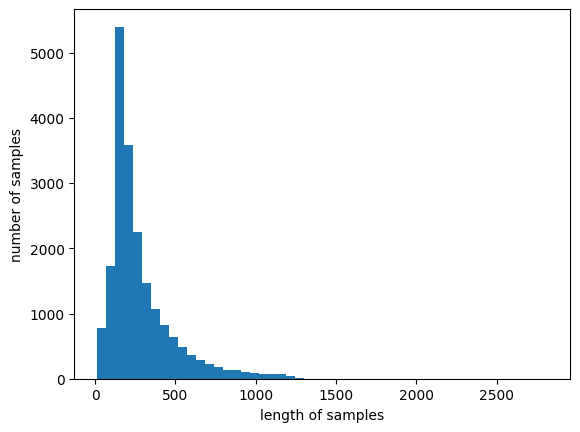

In [42]:
print('리뷰의 최대 길이 :',max(len(review) for review in encoded_X_train))
print('리뷰의 평균 길이 :',sum(map(len, encoded_X_train))/len(encoded_X_train))
plt.hist([len(review) for review in encoded_X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [43]:
## 전체 샘플 중 길이가 max_len 이하인 샘플의 비율이 몇 %인지 확인하는 함수

def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [44]:
## sample을 모두 사용하기 어렵다
## 500이하인것만 골라서 하자

max_len = 500
below_threshold_len(max_len, encoded_X_train)

전체 샘플 중 길이가 500 이하인 샘플의 비율: 87.795


In [45]:
def pad_sequences(sentences, max_len):
  features = np.zeros((len(sentences), max_len), dtype=int)
  for index, sentence in enumerate(sentences):
    if len(sentence) != 0:
      features[index, :len(sentence)] = np.array(sentence)[:max_len]
  return features

padded_X_train = pad_sequences(encoded_X_train, max_len=max_len)
padded_X_valid = pad_sequences(encoded_X_valid, max_len=max_len)
padded_X_test = pad_sequences(encoded_X_test, max_len=max_len)

print('훈련 데이터의 크기 :', padded_X_train.shape)
print('검증 데이터의 크기 :', padded_X_valid.shape)
print('테스트 데이터의 크기 :', padded_X_test.shape)

훈련 데이터의 크기 : (20000, 500)
검증 데이터의 크기 : (5000, 500)
테스트 데이터의 크기 : (25000, 500)


## 5. 모델링

In [47]:
## GRU 모델 구현 전

import torch
import torch.nn as nn
import torch.nn.functional as F

## 확인
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("cpu와 cuda 중 다음 기기로 학습함:", device)

cpu와 cuda 중 다음 기기로 학습함: cpu


In [49]:
## 좋은거 훈련데이터 상위 5개 출력

train_label_tensor = torch.tensor(np.array(y_train))
valid_label_tensor = torch.tensor(np.array(y_valid))
test_label_tensor = torch.tensor(np.array(y_test))
print(train_label_tensor[:5])

tensor([1, 1, 0, 0, 0])


In [50]:
## (32, 500) => 입력 데이터의 형태 => 임베딩 층 통과 후 => (32, 500, 100)
##  => GRU 통과 후 => (32, 128) => Softmax 출력층 통과 후 => (32, 2)

class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(TextClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim) # output_dim = 분류하고자하는 카테고리의 개수

    def forward(self, x):
        # x: (batch_size, seq_length) == (32, 500)
        embedded = self.embedding(x)  # (batch_size, seq_length, embedding_dim) == (32, 500, 100) == (데이터의 개수, 문장길이, 단어 벡터의 차원)
        gru_out, hidden = self.gru(embedded)  # gru_out: (batch_size, seq_length, hidden_dim), hidden: (1, batch_size, hidden_dim)
        last_hidden = hidden.squeeze(0)  # (batch_size, hidden_dim)
        logits = self.fc(last_hidden)  # (batch_size, output_dim)
        return logits


In [51]:
encoded_train = torch.tensor(padded_X_train).to(torch.int64)
train_dataset = torch.utils.data.TensorDataset(encoded_train, train_label_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=32)

encoded_test = torch.tensor(padded_X_test).to(torch.int64)
test_dataset = torch.utils.data.TensorDataset(encoded_test, test_label_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=1)

encoded_valid = torch.tensor(padded_X_valid).to(torch.int64)
valid_dataset = torch.utils.data.TensorDataset(encoded_valid, valid_label_tensor)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, shuffle=True, batch_size=1)

In [52]:
total_batch = len(train_dataloader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 625


In [54]:
## 모델 객체 선언

embedding_dim = 100
hidden_dim = 128
output_dim = 2
learning_rate = 0.01
num_epochs = 10

model = TextClassifier(vocab_size, embedding_dim, hidden_dim, output_dim)
model.to(device)

TextClassifier(
  (embedding): Embedding(38711, 100)
  (gru): GRU(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

In [56]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


## 6. 평가 코드 작성

In [57]:
## 모델의 정확도 측정 합수로 calculate_accuracy()활용

def calculate_accuracy(logits, labels):
    # _, predicted = torch.max(logits, 1)
    predicted = torch.argmax(logits, dim=1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

In [58]:
def evaluate(model, valid_dataloader, criterion, device):
    val_loss = 0
    val_correct = 0
    val_total = 0

    model.eval()
    with torch.no_grad():
        # 데이터로더로부터 배치 크기만큼의 데이터를 연속으로 로드
        for batch_X, batch_y in valid_dataloader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            # 모델의 예측값
            logits = model(batch_X)

            # 손실을 계산
            loss = criterion(logits, batch_y)

            # 정확도와 손실을 계산함
            val_loss += loss.item()
            val_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
            val_total += batch_y.size(0)

    val_accuracy = val_correct / val_total
    val_loss /= len(valid_dataloader)

    return val_loss, val_accuracy

## 7. 학습

In [ ]:
num_epochs = 5

# Training loop
best_val_loss = float('inf')

# Training loop
for epoch in range(num_epochs):
    # Training
    train_loss = 0
    train_correct = 0
    train_total = 0
    model.train()
    for batch_X, batch_y in train_dataloader:
        # Forward pass
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        # batch_X.shape == (batch_size, max_len)
        logits = model(batch_X)

        # Compute loss
        loss = criterion(logits, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate training accuracy and loss
        train_loss += loss.item()
        train_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
        train_total += batch_y.size(0)
        train_accuracy = train_correct / train_total
    train_loss /= len(train_dataloader)

    # Validation
    val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    # 검증 손실이 최소일 때 체크포인트 저장
    if val_loss < best_val_loss:
        print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. 체크포인트를 저장합니다.')
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model_checkpoint.pth')

Epoch 1/5:
Train Loss: 0.6983, Train Accuracy: 0.5008
Validation Loss: 0.6943, Validation Accuracy: 0.5094
Validation loss improved from inf to 0.6943. 체크포인트를 저장합니다.
Epoch 2/5:
Train Loss: 0.6908, Train Accuracy: 0.5127
Validation Loss: 0.6944, Validation Accuracy: 0.5086
Epoch 3/5:
Train Loss: 0.6680, Train Accuracy: 0.5722
Validation Loss: 0.7151, Validation Accuracy: 0.5896
Epoch 4/5:
Train Loss: 0.6097, Train Accuracy: 0.6530
Validation Loss: 0.4284, Validation Accuracy: 0.8250
Validation loss improved from 0.6943 to 0.4284. 체크포인트를 저장합니다.
Epoch 5/5:
Train Loss: 0.3455, Train Accuracy: 0.8578
Validation Loss: 0.3059, Validation Accuracy: 0.8712
Validation loss improved from 0.4284 to 0.3059. 체크포인트를 저장합니다.


## 8. 모델 로드 및 평가

In [ ]:
## 모델 로드하고 device에
model.load_state_dict(torch.load('best_model_checkpoint.pth'))
model.to(device)

In [ ]:
## 검증 데이터에 대한 정확도와 손실 계산
val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

print(f'Best model validation loss: {val_loss:.4f}')
print(f'Best model validation accuracy: {val_accuracy:.4f}')

In [ ]:
# 테스트 데이터에 대한 정확도와 손실 계산
test_loss, test_accuracy = evaluate(model, test_dataloader, criterion, device)

print(f'Best model test loss: {test_loss:.4f}')
print(f'Best model test accuracy: {test_accuracy:.4f}')


## 9. 모델 테스트

In [ ]:
index_to_tag = {0 : '부정', 1 : '긍정'}

def predict(text, model, word_to_index, index_to_tag):
    # 모델 평가 모드
    model.eval()

    # 토큰화 및 정수 인코딩. OOV 문제 발생 시 <UNK> 토큰에 해당하는 인덱스 1 할당
    tokens = word_tokenize(text)
    token_indices = [word_to_index.get(token.lower(), 1) for token in tokens]

    # 리스트를 텐서로 변경
    input_tensor = torch.tensor([token_indices], dtype=torch.long).to(device)  # (1, seq_length)

    # 모델의 예측
    with torch.no_grad():
        logits = model(input_tensor)  # (1, output_dim)

    # 레이블 인덱스 예측
    _, predicted_index = torch.max(logits, dim=1)  # (1,)

    # 인덱스와 매칭되는 카테고리 문자열로 변경
    predicted_tag = index_to_tag[predicted_index.item()]

    return predicted_tag

In [ ]:
test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

predict(test_input, model, word_to_index, index_to_tag)

In [ ]:
test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

predict(test_input, model, word_to_index, index_to_tag)